<a href="https://colab.research.google.com/github/MeravYitzchak/GAN-Model/blob/main/GAN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

# Load the generator model
generator = load_model('/content/drive/MyDrive/project NN/generator_model_alef3.h5')
# Load the discriminator model
discriminator = load_model('/content/drive/MyDrive/project NN/discriminator_model_alef3.h5')


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, LeakyReLU
from tensorflow.keras.optimizers import Adam
from PIL import Image
import io
from tensorflow.keras.layers import Reshape, Conv2DTranspose
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, LeakyReLU
from tensorflow.keras.optimizers import Adam
from PIL import Image
import matplotlib.pyplot as plt

# Load your dataset
test_data = pd.read_parquet('/content/drive/MyDrive/project NN/test-00000-of-00001-9bd45e5f227fb083.parquet')

# Convert the DataFrame to a NumPy array
test_data_array = test_data.values
test_data_array_alef=test_data_array[:39]
test_data_array_beth=test_data_array[39:83]
test_data_array_gimel=test_data_array[83:129]
test_data_array_dalet=test_data_array[130:174]
print(test_data_array_alef[0])

[{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00P\x00\x00\x00\x8d\x08\x02\x00\x00\x00\xaf\xd3j\x0b\x00\x00#YIDATx\x9c\xd5}\xc9s\\\xc7\xd1\xe7\xaf\x96\xb7\xf5\xde\x8d\x06\xbaA\x80 @\x90\x127\xd1\n}\x94%\x87t\xb05\xa3\x08_|\xf1]\x7f\x98\xff\x08\x9f\x1cc\xc7\x84\'\xe4\xb1"8\xdaB\x16e\x9a\x16\xa9\xa0H\x80\x0bvt\xa3\xf7~[\xd5\x1c\xf2u\xf5\xc3B\xa0I\x82&\xbf<\x90@\xe3-\x95\x95YY\x99\xbf\xcc\xacfJ)<\x9bb\x06\x00\x0c\x8c~UZ\xd1\xf5J)\xa5\x14c\x8cs\xce9\x07 \xb88po\x14GlD\xf4\x89\x1e\x91y)=at\x11\x1b\xbd5\xa6[\xcc\x8d\xe9\'\x1c3\xdaIH\x1e\xffg\x1a\x04\x03\x8e|\x8f\x19\xc7\xfe[\xc6\x7f=\xf2\x82\xd7K\'0\xbc\xbd\xb3\r\xc0\xb6\xedL&cI\x8b3\xae\x99\x06\xa0\xb5\xe6\x9cw\xbb]\xcb\xb2\x1c\xc7\x01 \xb9`\x80\x02\xba\xfd^\xbf\xdf\x07\xe0y\x9e\xef\xfb\x99l\xc6s\xbcX\xc5 -`\xe8\xf5{\x9e\xe7\x19Y\x91\xcc\xcd\xec\xd0\x7f\xf4\xd7#\xe5I\n\xf5\xaa\x18~\x19\xcax\x19\xcf\xf5h|a\x18\x02`\x16\xe3\x9c\xbb\xae{\x8a*\xfa\xbct\x02\xc3\x85B\x01\x00\xe3L\x8a\xe4\xca8\x8e\x01\xd0\x02.\x16\x8aJ\xab(\x8a\x004\xfb

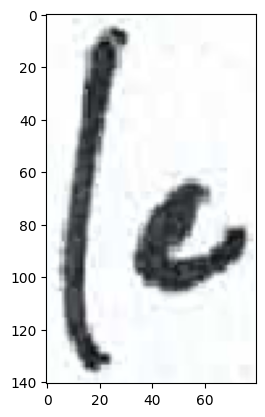

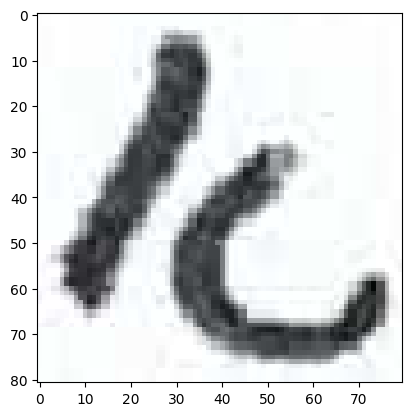

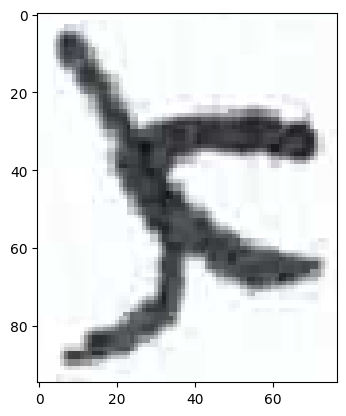

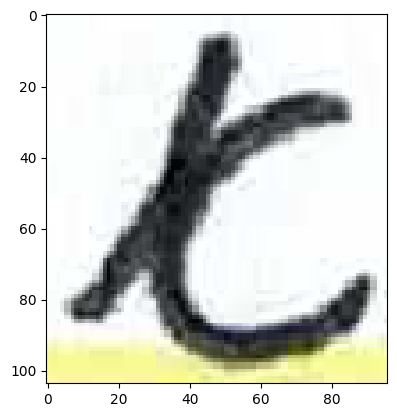

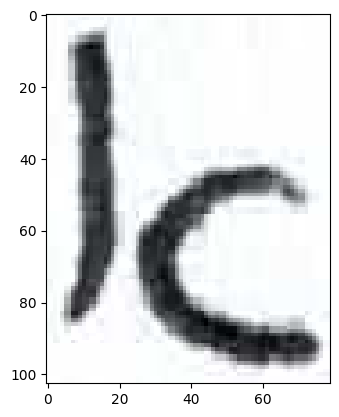

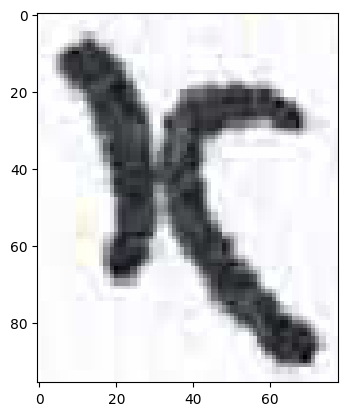

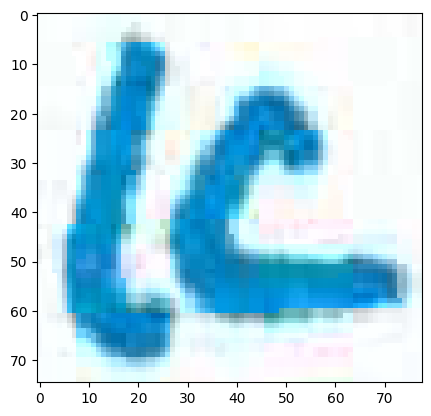

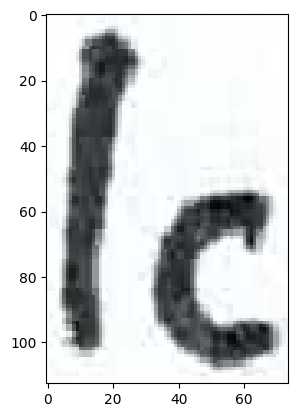

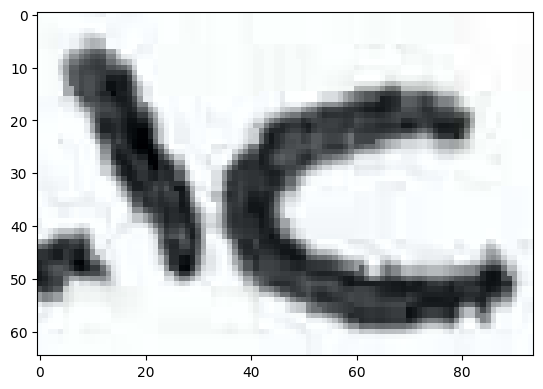

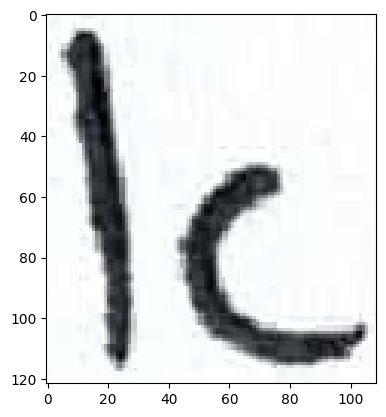

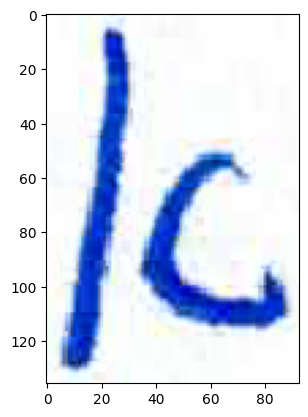

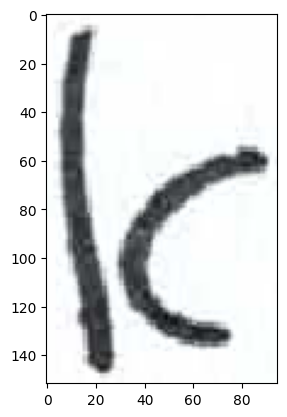

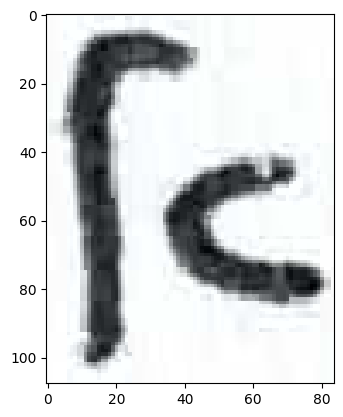

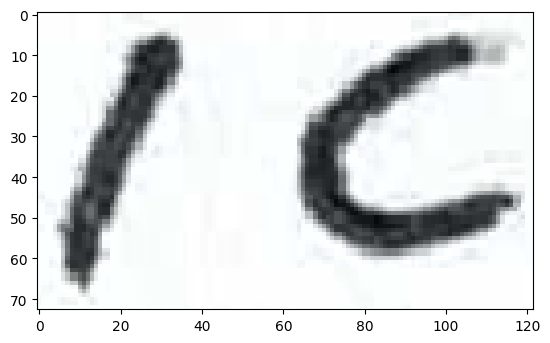

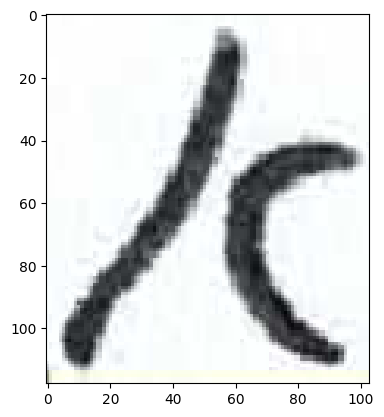

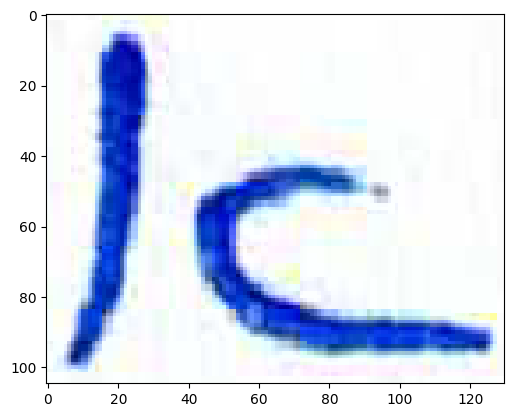

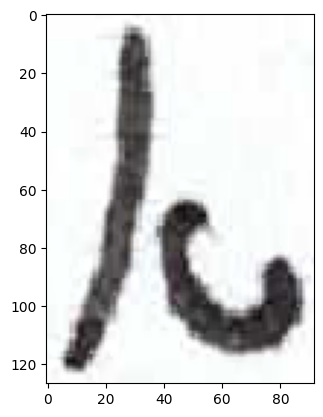

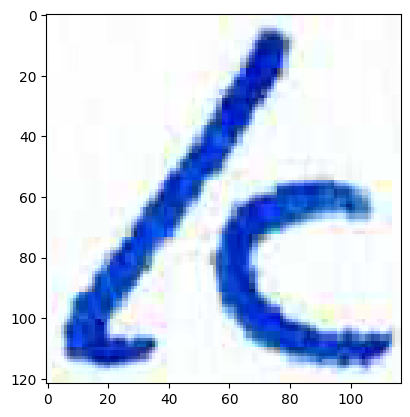

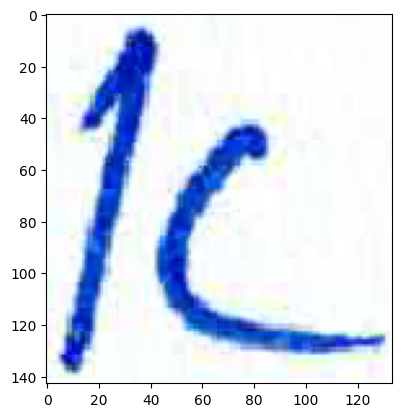

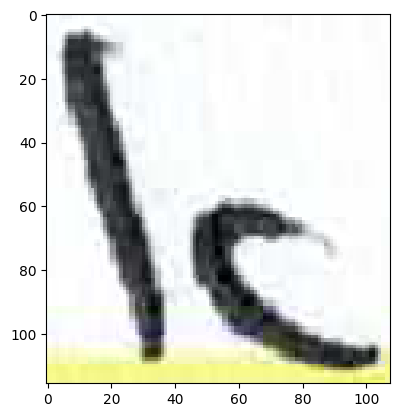

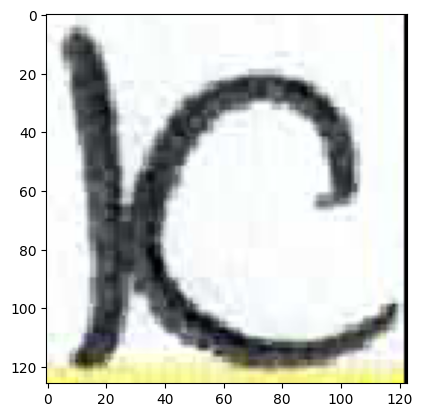

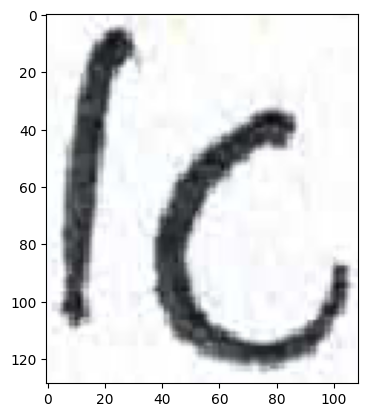

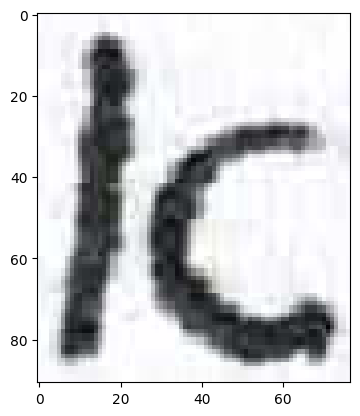

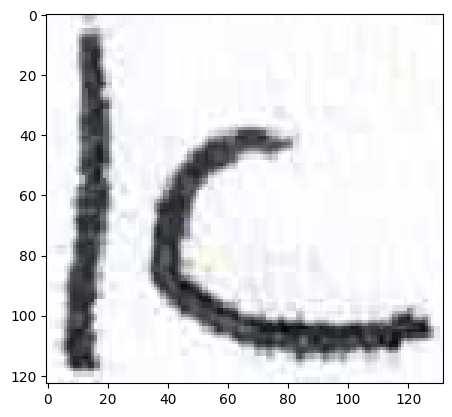

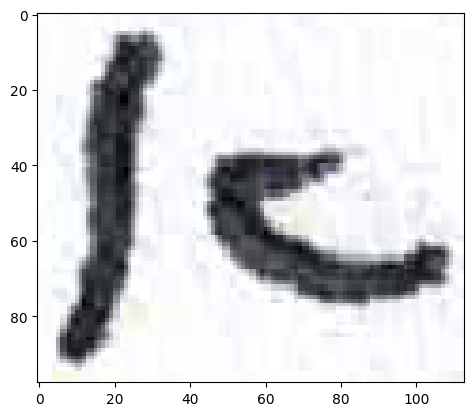

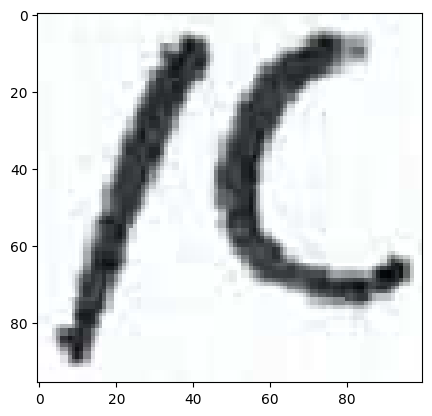

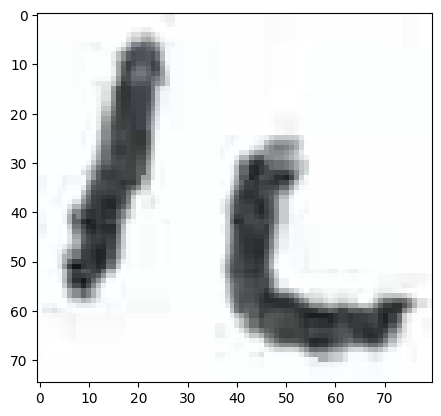

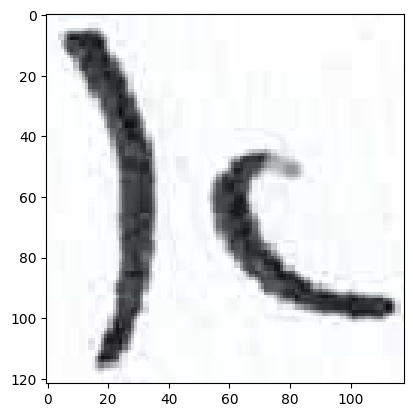

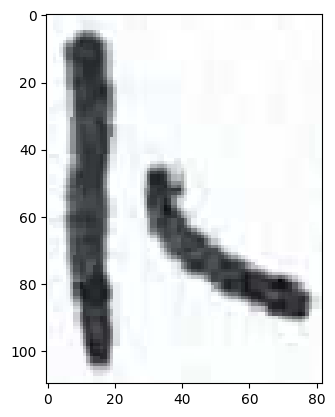

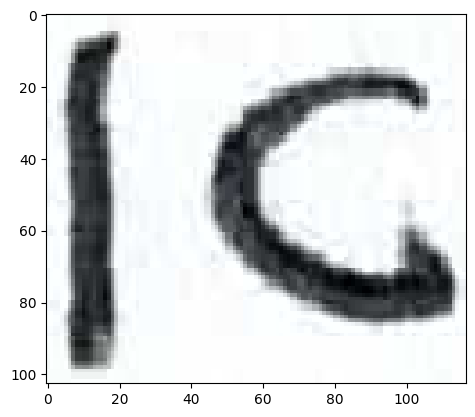

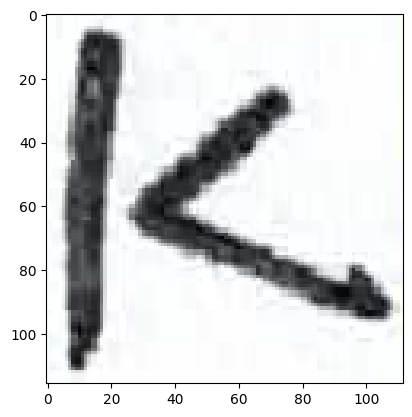

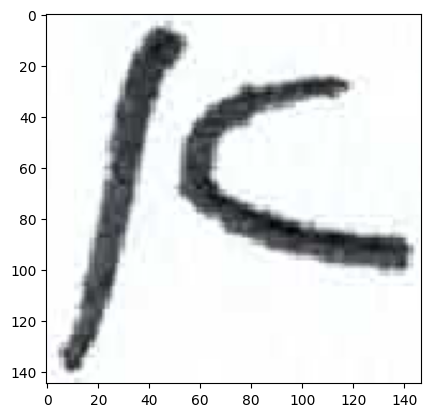

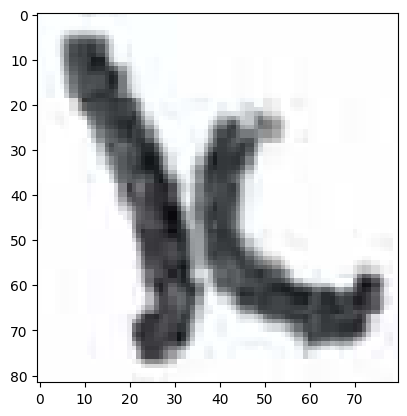

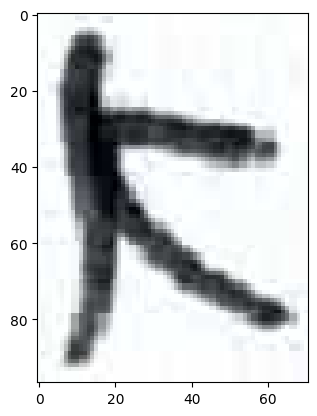

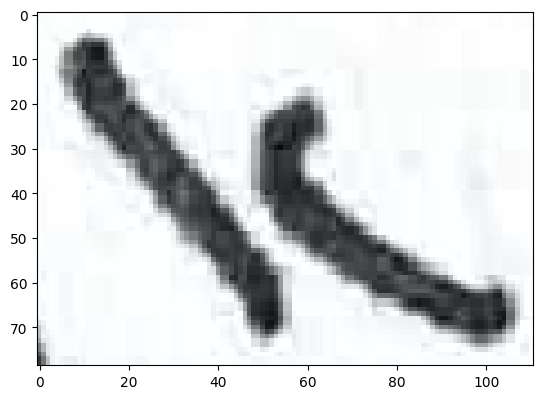

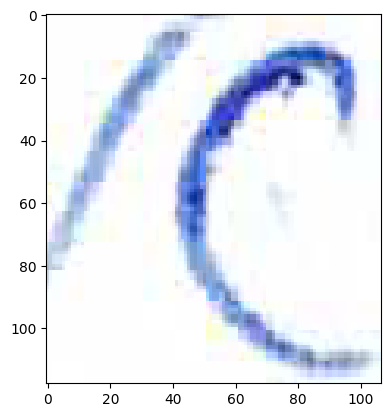

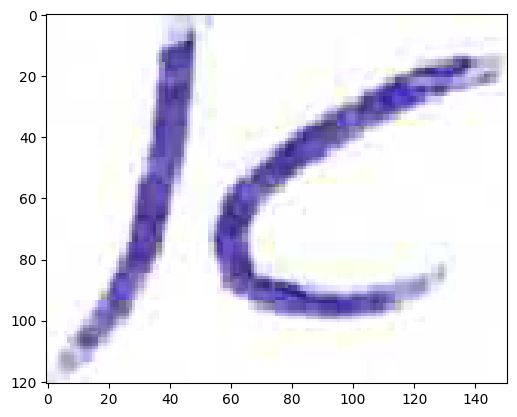

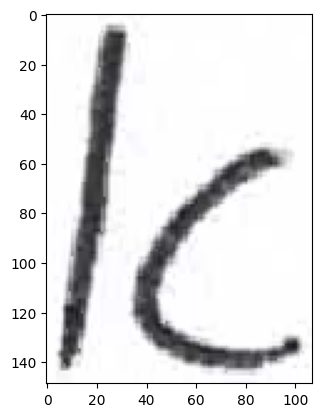

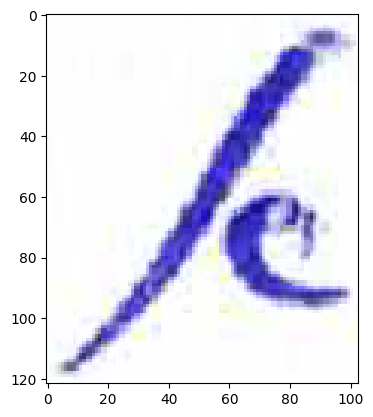

39
Discriminator Real Data Scores: [0.21095816791057587, 0.8974359035491943]


In [ ]:
# Preprocess test data
from PIL import Image
import numpy as np
import io
import matplotlib.pyplot as plt
def preprocess_image(image):
    desired_size = (28, 28)
    image = image.resize(desired_size)
    image_array = np.array(image)
    normalized_image_array = image_array / 255.0  # Normalize pixel values between 0 and 1
    return normalized_image_array

# Load and preprocess test data
test_data_processed = []
for item in test_data_array_alef:
    image_data = item[0]['bytes'] if 'bytes' in item[0] else None
    if image_data:
        image = Image.open(io.BytesIO(image_data))
        processed_image = preprocess_image(image)
        test_data_processed.append(processed_image)
        plt.figure()
        plt.imshow(image)
        plt.show()

test_data_processed = np.asarray(test_data_processed)
print(len(test_data_processed))
# Evaluate discriminator on real test data
real_labels = np.ones((len(test_data_processed), 1))
discriminator_real_score = discriminator.evaluate(test_data_processed, real_labels, verbose=0)
print("Discriminator Real Data Scores:", discriminator_real_score)


2/2 [==============================] - 1s 23ms/step
Discriminator Fake Data Scores: [0.05686687305569649, 1.0]


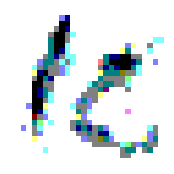

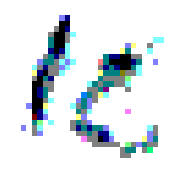

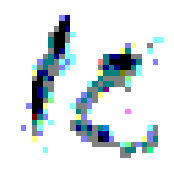

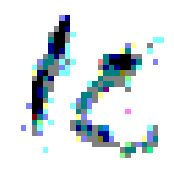

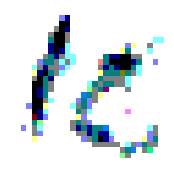

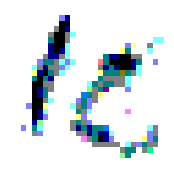

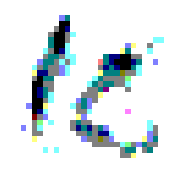

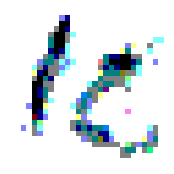

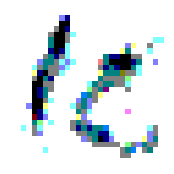

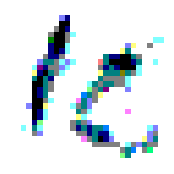

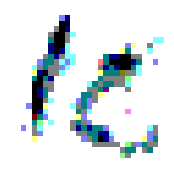

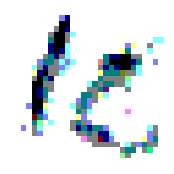

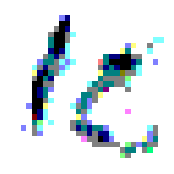

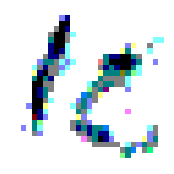

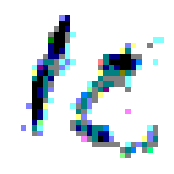

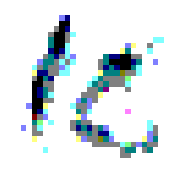

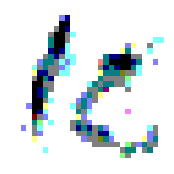

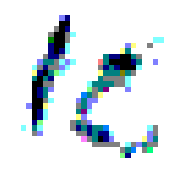

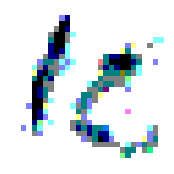

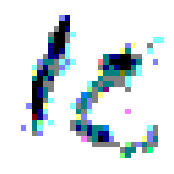

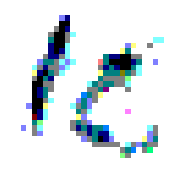

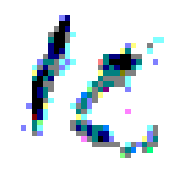

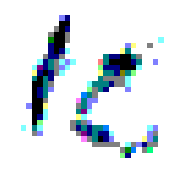

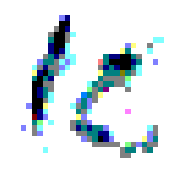

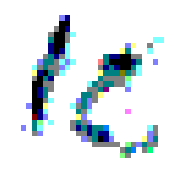

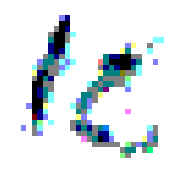

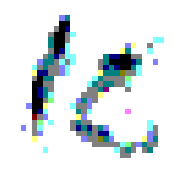

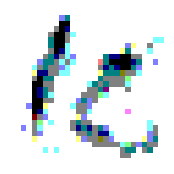

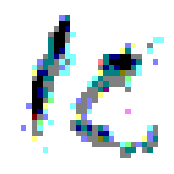

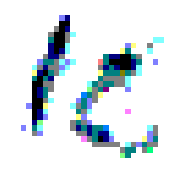

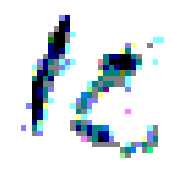

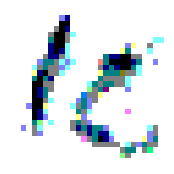

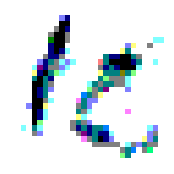

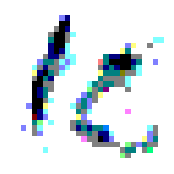

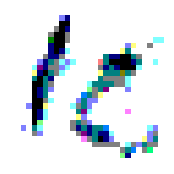

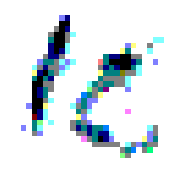

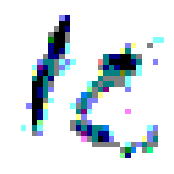

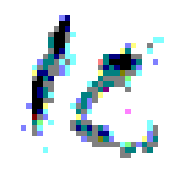

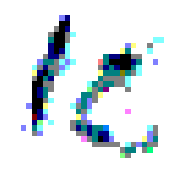

In [ ]:
latent_dim = 100  # A common value used in many GAN implementations
num_generated_images = len(test_data_processed)
num_images_to_generate = 1  # Number of images to generate and visualize

for _ in range(num_images_to_generate):
    # Generate images using the generator
    generated_images = generator.predict(np.random.randn(num_generated_images, latent_dim))  # Example of generating images from random noise

    # Evaluate discriminator on generated images
    fake_labels = np.zeros((num_generated_images, 1))
    discriminator_fake_score = discriminator.evaluate(generated_images, fake_labels, verbose=0)
    print("Discriminator Fake Data Scores:", discriminator_fake_score)

    # Visualize generated images in black, white, and gray only
    for generated_image in generated_images:
        generated_image = np.squeeze(generated_image)  # If needed to remove batch dimension

        # Thresholding for black, white, and gray
        generated_image_black = (generated_image < 0.25) * 0  # Values below 0.25 become black (0)
        generated_image_gray = ((generated_image >= 0.25) & (generated_image < 0.75)) * 128  # Values between 0.25 and 0.75 become gray (128)
        generated_image_white = (generated_image >= 0.75) * 255  # Values above 0.75 become white (255)

        # Combine the three thresholded images
        generated_image_trinary = generated_image_black + generated_image_gray + generated_image_white

        # Display the generated image in black, white, and gray with a smaller figure size
        plt.figure(figsize=(2, 2))  # Adjust the figure size as needed
        plt.imshow(generated_image_trinary, cmap='gray')  # Use the 'gray' colormap
        plt.axis('off')  # Turn off axis labels
        plt.show()
